# Lunar Cycle Influence on Twitter Sentiment and Stock Markets

article on lunar cycles & crime: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1444800/

project proposal write-up: https://docs.google.com/document/d/1sAl3SyxhI6gLZ1zDEHhtIOfjB0FzofjjM3Bp7CaIBgM/edit#

how to let web app access Twitter without exposing my keys: https://thurmancms.herokuapp.com/articles/how-to-add-twitter-access-token-and-secret-key-to-heroku-application



## Import Libraries

In [1]:
# for scraping the web
from bs4 import BeautifulSoup
import requests
from twitterscraper import query_tweets
import twitterscraper

# file management
import csv
import json
import subprocess
import shutil
from textblob import TextBlob 
# import preprocessor as p   #is this the right one?    I want this one: https://pypi.org/project/tweet-preprocessor/

import re
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#for modeling
# from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.stattools import adfuller
# import itertools

# Facebook Prophet libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics
import plotly.offline as py
pd.plotting.register_matplotlib_converters() #necessary to maintain pd.plotting functionality

# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose as sd

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


#### Obtain Scrub Explore Model iNterpret!

# 1. Obtaining the Data

## Obtaining Twitter Data

Twitter API documentation: https://developer.twitter.com/en/docs/api-reference-index

instructions on accessing the Twitter API and performing sentiment analysis: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

this one has more options and discusses removing user handles and more: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

lunar phases: https://www.calendar-12.com/moon_phases/2018
    
- automating Twitter requests with python: https://github.com/Jefferson-Henrique/GetOldTweets-python

### Tweet preprocessing & Sentiment analysis links

   - good blog enter on sentiment analysis & preprocessing tweets: https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
   - Python library that specifically cleans tweets: https://pypi.org/project/tweet-preprocessor/
   - some more customizable options: https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression 

to think about: do I want to keep happy/sad emojis? what about simply removing the '#' character from hashtags to retain text sentiment

We will use the `twitterscraper` library for obtaining tweets. Documentation here: https://github.com/taspinar/twitterscraper

#### using cmd line method

In [1]:
# define functions to automate Twitter scraping
def make_dates_list(year=2018):
    # define a list of dates for a given year
    dates_year =[str(date)[:10] for date in pd.date_range(start=f'1/1/{year}', end=f'12/31/{year}')]
    # define a list of dates for generating file names
    dates_stripped_year = [date.replace('-','') for date in dates_year]
    return dates_year, dates_stripped_year


def scrape_tweets(query, year=2018, num_tweets=1000):
    """
    Automatically scrapes X number of Tweets per day for a
    given year. Scraping works backwards from midnight.
    'query' must be a string
    ------------------------------------
    Generates a JSON file for each day scraped, and moves 
    to the subfolder 'data'.
    """
    dates_year, dates_stripped_year = make_dates_list(year)
    for i in range(len(dates_year)):
        begin_date = dates_year[i]
        if i == len(dates_year)-1:
            end_date = f'{year+1}-01-01'
        else:
            end_date = dates_year[i+1]
        day = dates_stripped_year[i]
        cmd = 'twitterscraper "{}" -l {} -o t{}.json -bd {} -ed {} --lang en'.format(query, 
                num_tweets, day, begin_date, end_date)
        subprocess.run(cmd)

        #move JSON file into `data` directory
        shutil.move(f't{day}.json', f'./data/t{day}.json')
        if (i+1)%5 == 0:
            print(f"finished scraping {i+1} days of {year}")
    print("SCRAPING PROCESS COMPLETE!")
    pass

In [125]:
query = 'life OR death OR happy OR sad Exclude:retweets'
scrape_tweets(query=query, year=2018, num_tweets=1000)

finished scraping 0 days of 2018
finished scraping 1 days of 2018
finished scraping 2 days of 2018
finished scraping 3 days of 2018
finished scraping 4 days of 2018
finished scraping 5 days of 2018
finished scraping 6 days of 2018
finished scraping 7 days of 2018
finished scraping 8 days of 2018
finished scraping 9 days of 2018
finished scraping 10 days of 2018
finished scraping 11 days of 2018
finished scraping 12 days of 2018
finished scraping 13 days of 2018
finished scraping 14 days of 2018
finished scraping 15 days of 2018
finished scraping 16 days of 2018
finished scraping 17 days of 2018
finished scraping 18 days of 2018
finished scraping 19 days of 2018
finished scraping 20 days of 2018
finished scraping 21 days of 2018
finished scraping 22 days of 2018
finished scraping 23 days of 2018
finished scraping 24 days of 2018
finished scraping 25 days of 2018
finished scraping 26 days of 2018
finished scraping 27 days of 2018
finished scraping 28 days of 2018
finished scraping 29 day

finished scraping 238 days of 2018
finished scraping 239 days of 2018
finished scraping 240 days of 2018
finished scraping 241 days of 2018
finished scraping 242 days of 2018
finished scraping 243 days of 2018
finished scraping 244 days of 2018
finished scraping 245 days of 2018
finished scraping 246 days of 2018
finished scraping 247 days of 2018
finished scraping 248 days of 2018
finished scraping 249 days of 2018
finished scraping 250 days of 2018
finished scraping 251 days of 2018
finished scraping 252 days of 2018
finished scraping 253 days of 2018
finished scraping 254 days of 2018
finished scraping 255 days of 2018
finished scraping 256 days of 2018
finished scraping 257 days of 2018
finished scraping 258 days of 2018
finished scraping 259 days of 2018
finished scraping 260 days of 2018
finished scraping 261 days of 2018
finished scraping 262 days of 2018
finished scraping 263 days of 2018
finished scraping 264 days of 2018
finished scraping 265 days of 2018
finished scraping 26

## Obtaining Financial Data

website to get historical infra-day stock prices: https://www.alphavantage.co/documentation/
   - request limitations: 5/minute, 500/day
   - URL structure: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo
   - (back up option: https://docs.intrinio.com/tutorial/web_api)
   
I need to be careful about how I look at this data. Since stock markets are only open 6.5 hours a day, 5 days a week, certain lunar cycle days will fall on weekends, while considerable after-hours trading can affect next-day opening prices. Since lunar cycles are most noticeble at night, I should probably set stock days as 24-hour periods, from opening bell to following opening bell to account for evening trading. 

# HOW DO I HIDE my API keys from the public and still use the code???

In [5]:
# do NOT post this block of code publicly!!
stocks_API_key = ''

In [6]:
# Enter the Stock Symbol for data request
symbol = 'MSFT'

# Making an API request for a certain stock's hsitory
credentials = {'function':'TIME_SERIES_DAILY',
               'symbol':symbol,
               'outputsize':'full',
               'apikey':stocks_API_key}
r = requests.get('https://www.alphavantage.co/query', params=credentials)

# checking to make sure request was successful
print(r.status_code)
if r.status_code == requests.codes.ok:
    print("Request Successful")

200
Request Successful


In [7]:
# cleaning up the data to make it easier to work with
MSFTdf = pd.DataFrame(r.json()["Time Series (Daily)"])
MSFTdf = MSFTdf.T.reset_index()
MSFTdf.columns = ['date','open','high','low','close','volume']
MSFTdf.date = pd.to_datetime(MSFTdf.date)
MSFTdf[['open','high','low','close','volume']] = MSFTdf[['open',
    'high','low','close','volume']].astype(float)

# create a new column to account for after-hours trading
# this uses the next day's open value as the prior day's close value
cl24 = [MSFTdf.loc[0].close]
for val in MSFTdf.open.values:
    cl24.append(val)
cl24 = pd.DataFrame(cl24[:-1], columns=['close_24'])
MSFTdf = MSFTdf.join(cl24)

# now we must account for when afterhours trading exceeds high/low values
MSFTdf['high_24'] = MSFTdf[['high', 'close_24']].values.max(1)
MSFTdf['low_24'] = MSFTdf[['low', 'close_24']].values.min(1)

# and add a few more columns that should be useful
MSFTdf['range'] = MSFTdf['high'] - MSFTdf['low']
MSFTdf['range_24'] = MSFTdf['high_24'] - MSFTdf['low_24']
MSFTdf['change_24'] = MSFTdf['close_24'] - MSFTdf['open']

# setting date column as index to facilitate timeseries manipulation
MSFTdf.set_index('date', inplace=True)

In [8]:
# selecting only 2018 data
MSFT_2018 = MSFTdf['2018':'2018']
MSFT_2018.tail()

open   high     low  close      volume  close_24  high_24  \
date                                                                      
2018-01-08  88.200  88.58  87.605  88.28  22113000.0    88.650    88.65   
2018-01-05  87.660  88.41  87.430  88.19  23407100.0    88.200    88.41   
2018-01-04  86.590  87.66  86.570  87.11  21912000.0    87.660    87.66   
2018-01-03  86.055  86.51  85.970  86.35  26061400.0    86.590    86.59   
2018-01-02  86.125  86.31  85.500  85.95  22483800.0    86.055    86.31   

            low_24  range  range_24  change_24  
date                                            
2018-01-08  87.605  0.975     1.045      0.450  
2018-01-05  87.430  0.980     0.980      0.540  
2018-01-04  86.570  1.090     1.090      1.070  
2018-01-03  85.970  0.540     0.620      0.535  
2018-01-02  85.500  0.810     0.810     -0.070

In [9]:
MSFT_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-12-31 to 2018-01-02
Data columns (total 11 columns):
open         251 non-null float64
high         251 non-null float64
low          251 non-null float64
close        251 non-null float64
volume       251 non-null float64
close_24     251 non-null float64
high_24      251 non-null float64
low_24       251 non-null float64
range        251 non-null float64
range_24     251 non-null float64
change_24    251 non-null float64
dtypes: float64(11)
memory usage: 23.5 KB


### Let's also see how Bitcoin performs

In [10]:
# Entering the Currency Symbols
symbol = 'BTC'

# Making an API request for a certain stock's hsitory
credentials = {'function':'DIGITAL_CURRENCY_DAILY', 
               'symbol':symbol, 
               'market':'USD', 
               'apikey':stocks_API_key}
r = requests.get('https://www.alphavantage.co/query', params=credentials)

# checking to make sure request was successful
print(r.status_code)
if r.status_code == requests.codes.ok:
    print("Request Successful")

200
Request Successful


In [11]:
# cleaning up the data to make it easier to work with
BTCdf = pd.DataFrame(r.json()["Time Series (Digital Currency Daily)"])
BTCdf = BTCdf.T.reset_index()
BTCdf.drop(columns=["1b. open (USD)","2b. high (USD)","3b. low (USD)",
    "4b. close (USD)","6. market cap (USD)"], inplace=True, axis=1)
BTCdf.columns = ['date','open','high','low','close','volume']
BTCdf.date = pd.to_datetime(BTCdf.date)
BTCdf[['open','high','low','close','volume']] = BTCdf[['open',
    'high','low','close','volume']].astype(float)

# create a new column to account for after-hours trading
# this uses the next day's open value as the prior day's close value
cl24 = [BTCdf.loc[0].close]
for val in BTCdf.open.values:
    cl24.append(val)
cl24 = pd.DataFrame(cl24[:-1], columns=['close_24'])
BTCdf = BTCdf.join(cl24)

# now we must account for when afterhours trading exceeds high/low values
BTCdf['high_24'] = BTCdf[['high', 'close_24']].values.max(1)
BTCdf['low_24'] = BTCdf[['low', 'close_24']].values.min(1)

# and add a few more columns that should be useful
BTCdf['range'] = BTCdf['high'] - BTCdf['low']
BTCdf['range_24'] = BTCdf['high_24'] - BTCdf['low_24']
BTCdf['change_24'] = BTCdf['close_24'] - BTCdf['open']

# setting date column as index to facilitate timeseries manipulation
BTCdf.set_index('date', inplace=True)

# selecting only 2018 data
BTC_2018 = BTCdf['2018':'2018']
display(BTC_2018.head())
BTC_2018.info()

open     high      low    close        volume  close_24  \
date                                                                     
2018-12-31  3803.12  3810.00  3630.33  3702.90  29991.778350   3701.23   
2018-12-30  3696.71  3903.50  3657.90  3801.91  33222.369262   3803.12   
2018-12-29  3839.00  3892.00  3670.00  3695.32  38874.373903   3696.71   
2018-12-28  3567.89  3887.25  3540.04  3839.26  45964.304987   3839.00   
2018-12-27  3777.74  3813.98  3535.00  3567.91  44097.392912   3567.89   

            high_24   low_24   range  range_24  change_24  
date                                                       
2018-12-31  3810.00  3630.33  179.67    179.67    -101.89  
2018-12-30  3903.50  3657.90  245.60    245.60     106.41  
2018-12-29  3892.00  3670.00  222.00    222.00    -142.29  
2018-12-28  3887.25  3540.04  347.21    347.21     271.11  
2018-12-27  3813.98  3535.00  278.98    278.98    -209.85

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-12-31 to 2018-01-01
Data columns (total 11 columns):
open         365 non-null float64
high         365 non-null float64
low          365 non-null float64
close        365 non-null float64
volume       365 non-null float64
close_24     365 non-null float64
high_24      365 non-null float64
low_24       365 non-null float64
range        365 non-null float64
range_24     365 non-null float64
change_24    365 non-null float64
dtypes: float64(11)
memory usage: 34.2 KB


### How about the Euro?

In [12]:
# Entering the Currency Symbols
symbol = 'EUR'

# Making an API request for a certain stock's hsitory
credentials = {'function':'FX_DAILY', 
               'from_symbol':symbol, 
               'to_symbol':'USD', 
               'outputsize':'full',
               'apikey':stocks_API_key}
r = requests.get('https://www.alphavantage.co/query', params=credentials)

# checking to make sure request was successful
print(r.status_code)
if r.status_code == requests.codes.ok:
    print("Request Successful")

200
Request Successful


In [13]:
# cleaning up the data to make it easier to work with
EURdf = pd.DataFrame(r.json()["Time Series FX (Daily)"])
EURdf = EURdf.T.reset_index()
EURdf.columns = ['date','open','high','low','close']
EURdf.date = pd.to_datetime(EURdf.date)
EURdf[['open','high','low','close']] = EURdf[['open',
    'high','low','close']].astype(float)

# create a new column to account for after-hours trading
# this uses the next day's open value as the prior day's close value
cl24 = [EURdf.loc[0].close]
for val in EURdf.open.values:
    cl24.append(val)
cl24 = pd.DataFrame(cl24[:-1], columns=['close_24'])
EURdf = EURdf.join(cl24)

# now we must account for when afterhours trading exceeds high/low values
EURdf['high_24'] = EURdf[['high', 'close_24']].values.max(1)
EURdf['low_24'] = EURdf[['low', 'close_24']].values.min(1)

# and add a few more columns that should be useful
EURdf['range'] = EURdf['high'] - EURdf['low']
EURdf['range_24'] = EURdf['high_24'] - EURdf['low_24']
EURdf['change_24'] = EURdf['close_24'] - EURdf['open']

# setting date column as index to facilitate timeseries manipulation
EURdf.set_index('date', inplace=True)

# selecting only 2018 data
EUR_2018 = EURdf['2018':'2018']
display(EUR_2018.head())
EUR_2018.info()

open    high     low   close  close_24  high_24  low_24   range  \
date                                                                            
2018-12-31  1.1439  1.1467  1.1420  1.1466    1.1465   1.1467  1.1420  0.0047   
2018-12-30  1.1445  1.1450  1.1433  1.1439    1.1439   1.1450  1.1433  0.0017   
2018-12-28  1.1429  1.1473  1.1426  1.1442    1.1445   1.1473  1.1426  0.0047   
2018-12-27  1.1355  1.1454  1.1354  1.1429    1.1429   1.1454  1.1354  0.0100   
2018-12-26  1.1411  1.1420  1.1341  1.1355    1.1355   1.1420  1.1341  0.0079   

            range_24  change_24  
date                             
2018-12-31    0.0047     0.0026  
2018-12-30    0.0017    -0.0006  
2018-12-28    0.0047     0.0016  
2018-12-27    0.0100     0.0074  
2018-12-26    0.0079    -0.0056

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2018-12-31 to 2018-01-01
Data columns (total 10 columns):
open         314 non-null float64
high         314 non-null float64
low          314 non-null float64
close        314 non-null float64
close_24     314 non-null float64
high_24      314 non-null float64
low_24       314 non-null float64
range        314 non-null float64
range_24     314 non-null float64
change_24    314 non-null float64
dtypes: float64(10)
memory usage: 27.0 KB


### And also the S&P 500 Index

The S&P 500 is an average of the performance of 500 large companies, so we can use this to approximate the entire stock market. (It is one of the most commonly used indicators of the overall US stock market).

In [14]:
# Entering the Stock Symbol
symbol = 'INX'

# Making an API request for a certain stock's hsitory
credentials = {'function':'TIME_SERIES_DAILY',
               'symbol':symbol,
               'outputsize':'full',
               'apikey':stocks_API_key}
r = requests.get('https://www.alphavantage.co/query', params=credentials)

# checking to make sure request was successful
print(r.status_code)
if r.status_code == requests.codes.ok:
    print("Request Successful")

200
Request Successful


In [15]:
# cleaning up the data to make it easier to work with
SP500df = pd.DataFrame(r.json()["Time Series (Daily)"])
SP500df = SP500df.T.reset_index()
SP500df.columns = ['date','open','high','low','close','volume']
SP500df.date = pd.to_datetime(SP500df.date)
SP500df[['open','high','low','close','volume']] = SP500df[['open',
    'high','low','close','volume']].astype(float)

# create a new column to account for after-hours trading
# this uses the next day's open value as the prior day's close value
cl24 = [SP500df.loc[0].close]
for val in SP500df.open.values:
    cl24.append(val)
cl24 = pd.DataFrame(cl24[:-1], columns=['close_24'])
SP500df = SP500df.join(cl24)

# now we must account for when afterhours trading exceeds high/low values
SP500df['high_24'] = SP500df[['high', 'close_24']].values.max(1)
SP500df['low_24'] = SP500df[['low', 'close_24']].values.min(1)

# and add a few more columns that should be useful
SP500df['range'] = SP500df['high'] - SP500df['low']
SP500df['range_24'] = SP500df['high_24'] - SP500df['low_24']
SP500df['change_24'] = SP500df['close_24'] - SP500df['open']

# setting date column as index to facilitate timeseries manipulation
SP500df.set_index('date', inplace=True)

# selecting only 2018 data
SP500_2018 = SP500df['2018':'2018']
display(SP500_2018.head())
SP500_2018.info()

open       high        low      close        volume  \
date                                                                   
2018-12-31  2498.9399  2509.2400  2482.8201  2506.8501  3.442870e+09   
2018-12-28  2498.7700  2520.2700  2472.8899  2485.7400  3.702620e+09   
2018-12-27  2442.5000  2489.1001  2397.9399  2488.8301  4.096610e+09   
2018-12-26  2363.1201  2467.7600  2346.5801  2467.7000  4.233990e+09   
2018-12-24  2400.5601  2410.3401  2351.1001  2351.1001  2.613930e+09   

             close_24    high_24     low_24     range  range_24  change_24  
date                                                                        
2018-12-31  2476.9600  2509.2400  2476.9600   26.4199   32.2800   -21.9799  
2018-12-28  2498.9399  2520.2700  2472.8899   47.3801   47.3801     0.1699  
2018-12-27  2498.7700  2498.7700  2397.9399   91.1602  100.8301    56.2700  
2018-12-26  2442.5000  2467.7600  2346.5801  121.1799  121.1799    79.3799  
2018-12-24  2363.1201  2410.3401  2351.1001   59.2400   59.2400   -37.4400

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-12-31 to 2018-01-02
Data columns (total 11 columns):
open         251 non-null float64
high         251 non-null float64
low          251 non-null float64
close        251 non-null float64
volume       251 non-null float64
close_24     251 non-null float64
high_24      251 non-null float64
low_24       251 non-null float64
range        251 non-null float64
range_24     251 non-null float64
change_24    251 non-null float64
dtypes: float64(11)
memory usage: 23.5 KB


# 2. Scrubbing the Data

Thankfully, the stock market data is already completely cleaned. The twitter data, however, still requires pretty extensive scrubbing to remove odd characters, links, and usernames. 

### FIRST I MUST PROCESS THE TWEETS

CSVwriter doesn't understand emojis and some other special characters, so I need to remove them.

In [275]:
# Let's define sets of old-school emoticons and emojis
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [274]:
# Define functions to clean tweets and get tweet sentiment

# portions of the code below comes from :
# https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
def replace_emoticons(tweet):
    "This code replaces happy and sad emoticons with the words 'HAPPY' and 'SAD'"
    rhappy = '[' + re.escape(''.join(emoticons_happy)) + ']'
    re.sub(rhappy, ' HAPPY ', tweet)
    rsad = '[' + re.escape(''.join(emoticons_sad)) + ']'
    re.sub(rsad, ' SAD ', tweet)
    return tweet

def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, usernames, and
    special characters using simple regex statements. 
    '''
    tweet = replace_emoticons(tweet)
    # p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION)
    # tweet = p.clean(tweet)
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) \
                            |(\w+:\/\/\S+)", " ", tweet).split())
    return tweet

def double_clean_tweet(tweet):
    "This function goes a little further than the previous clean function"
    #removing mentions
    tweet = re.sub(r':', ' ', tweet)
    tweet = re.sub(r'‚Ä¶', ' ', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #remove emojis from tweet  (unless you want to later go through the UNICODE
    # charts and separate "happy" emojis from "sad" emojis and add them to 
    # the `replace_emoticons()` function)
    tweet = emoji_pattern.sub(r'', tweet)
    return tweet


# Sentiment analysis code below adapted from:
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    # set sentiment 
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    if analysis.sentiment.polarity > 0.1: 
        sentiment = 'positive'
    elif analysis.sentiment.polarity < -0.1: 
        sentiment = 'negative'
    else: 
        sentiment = 'neutral'
    return sentiment, polarity, subjectivity

In [277]:
# define a function to create a .CSV file that compiles the relevant 
# info from the JSONs, preprocesses the tweets, and performs sentiment analysis
def json_to_csv_tweets(output_filename='output.csv', year=2018):
    """
    Takes in JSON files of scraped tweets from the `./data/` folder,
    cleans the tweets, performs sentiment analysis, and then outputs
    the results to the provided destination CSV filename.
    """
    # create the csv writer object
    csvwriter = csv.writer(open(output_filename, 'w', newline=''))
    csvwriter.writerow(["timestamp", "text", "sentiment", "polarity", "subjectivity", "tally"])

    # iterate adding rows of JSON to the CSV file
    dates_year, dates_stripped_year = make_dates_list(year)
    for i in dates_stripped_year:
        f = open(f'./data/t{i}.json')
        data = json.load(f)
        for tweet in data:
            tw = tweet["text"]
            tw = replace_emoticons(tw)
            tw = clean_tweet(tw)
            tw = double_clean_tweet(tw)
            sentiment, polarity, subjectivity = get_tweet_sentiment(tw)
            csvwriter.writerow([i, tw, sentiment, polarity, subjectivity, 1])
        f.close()
        if float(i)%20 == 0:
            print(f"Finished working with:   ./data/t{i}.json")
    print("JOB IS COMPLETELY FINISHED.  HOORAY!!")
    pass

In [142]:
json_to_csv_tweets('tweets_2018.csv', year=2018)

Finished working with:   ./data/t20180120.json
Finished working with:   ./data/t20180220.json
Finished working with:   ./data/t20180320.json
Finished working with:   ./data/t20180420.json
Finished working with:   ./data/t20180520.json
Finished working with:   ./data/t20180620.json
Finished working with:   ./data/t20180720.json
Finished working with:   ./data/t20180820.json
Finished working with:   ./data/t20180920.json
Finished working with:   ./data/t20181020.json
Finished working with:   ./data/t20181120.json
Finished working with:   ./data/t20181220.json
JOB IS COMPLETELY FINISHED.  HOORAY!!


In [19]:
tw_df = pd.read_csv('tweets_2018.csv')
tw_df.timestamp = pd.to_datetime(tw_df.timestamp, format='%Y%m%d')

In [20]:
display(tw_df.head())
tw_df.info()

timestamp                                               text sentiment  \
0 2018-01-01  Thanks for your insightful commentaryIf only l...   neutral   
1 2018-01-01                         1st-Mail | HAPPY NEW YEAR!  positive   
2 2018-01-01  Poor and sick?May God be with you,in the futur...  negative   
3 2018-01-01                                     Happy birthday  positive   
4 2018-01-01  Late to the party but HAPPY NEW YEAR to all yo...  positive   

   polarity  subjectivity  tally  
0  0.008333      0.408333      1  
1  0.485227      0.727273      1  
2 -0.100000      0.241667      1  
3  0.800000      1.000000      1  
4  0.181061      0.534091      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370206 entries, 0 to 370205
Data columns (total 6 columns):
timestamp       370206 non-null datetime64[ns]
text            370206 non-null object
sentiment       370206 non-null object
polarity        370206 non-null float64
subjectivity    370206 non-null float64
tally           370206 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 16.9+ MB


In [21]:
grouped1 = pd.DataFrame(tw_df.groupby(['timestamp'])['tally'].sum())
grouped1 = grouped1.sort_values(by=['tally'])
grouped1.head()

tally
timestamp        
2018-01-13     20
2018-02-14    300
2018-04-17    680
2018-06-02   1007
2018-12-21   1017

**According to the table above, it seems that our twitter scraper may have failed to work properly for 3 days of the year. That's not too bad, so we'll ignore it for now.**

# 3. Exploratory Data Analysis (EDA)



In [22]:
grouped = pd.DataFrame(tw_df.groupby(['timestamp', 'sentiment'])['tally'].sum()).reset_index()
grouped.head(7)

timestamp sentiment  tally
0 2018-01-01  negative     94
1 2018-01-01   neutral    128
2 2018-01-01  positive    798
3 2018-01-02  negative    131
4 2018-01-02   neutral    218
5 2018-01-02  positive    669
6 2018-01-03  negative    153

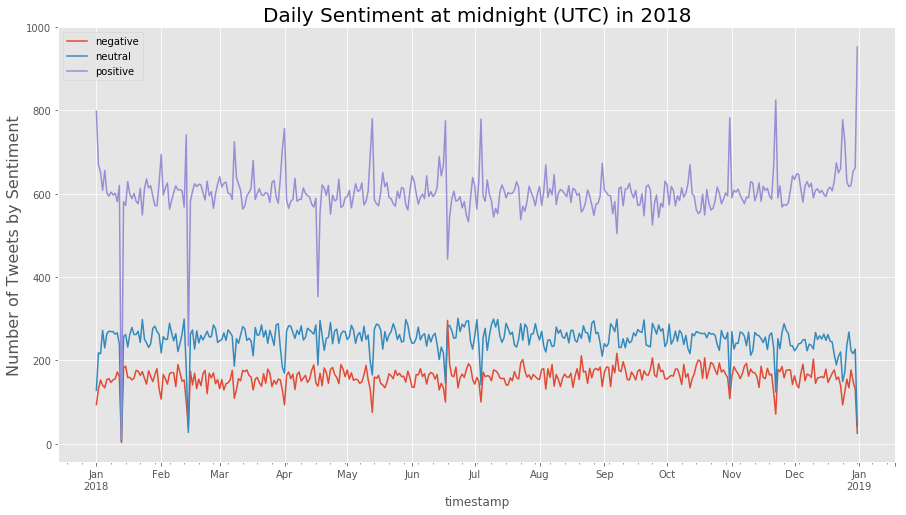

In [25]:
# let's plot sentiment trends for our query of 2018 tweets
for sentiment in grouped.sentiment.unique():
    temp_df = grouped[grouped.sentiment == sentiment].set_index('timestamp')
    temp_df['tally'].plot(figsize=(15,8), label=sentiment)
plt.legend()
plt.ylabel("Number of Tweets by Sentiment", fontsize=16)
plt.title("Daily Sentiment at midnight (UTC) in 2018", fontsize=20);

In [26]:
# Make a dictionary for each sentiment
t2018 = {}
for sentiment in grouped.sentiment.unique():
    temp = grouped[grouped.sentiment == sentiment].set_index('timestamp')
    temp.drop('sentiment', axis=1, inplace=True)
    t2018[sentiment] = temp
    
# Log transform the values
t2018_log = {}
for sentiment in t2018.keys():
    t2018_log[sentiment] = np.log(t2018[sentiment])
    
# # Differencing the log-transformed values to remove seasonality
# t2018_log_diff = {}
# for key in list(t2018.keys()):
#     t2018_log_diff[key] = t2018_log[key].diff(periods=7).dropna()
    
# t2018_log_diff['positive'].plot()
# t2018_log_diff['negative'].plot()
# t2018_log_diff['neutral'].plot();

In [27]:
# Define a function to decompose a time series, in order to detect
# trends and seasonality, and allow for examining the residuals
def df_decompose(df):
    # Gather the trend, seasonality and noise of decomposed object
    trend = sd(df).trend
    seasonal = sd(df).seasonal
    residual = sd(df).resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.title(f"Decomposition for {df}")
    plt.subplot(411)
    plt.plot(df, label='Original', color="blue")
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="blue")
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color="blue")
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="blue")
    plt.legend(loc='best')
    plt.tight_layout();
    
    return residual.dropna()

negative
neutral
positive


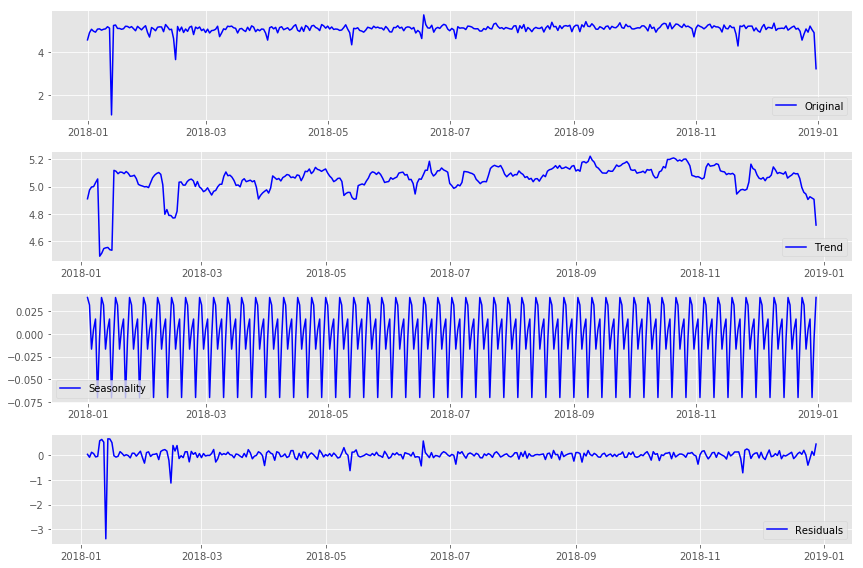

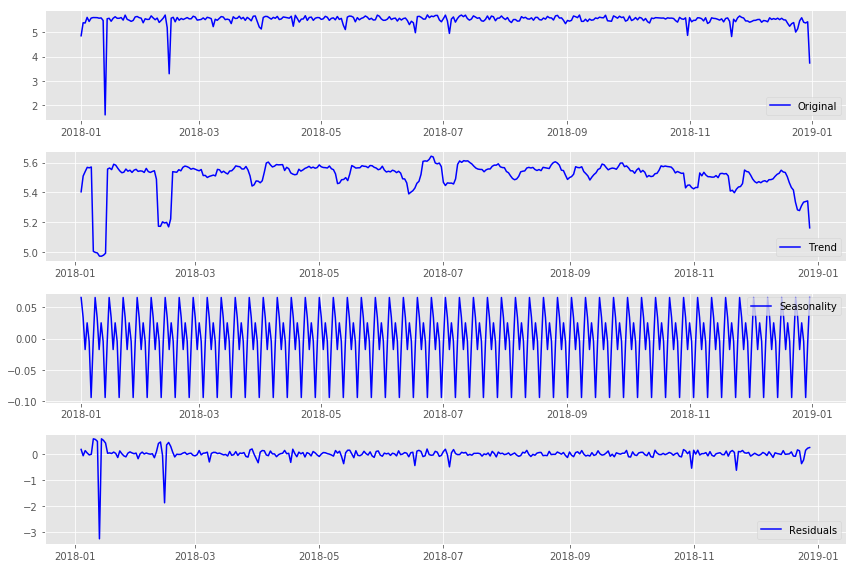

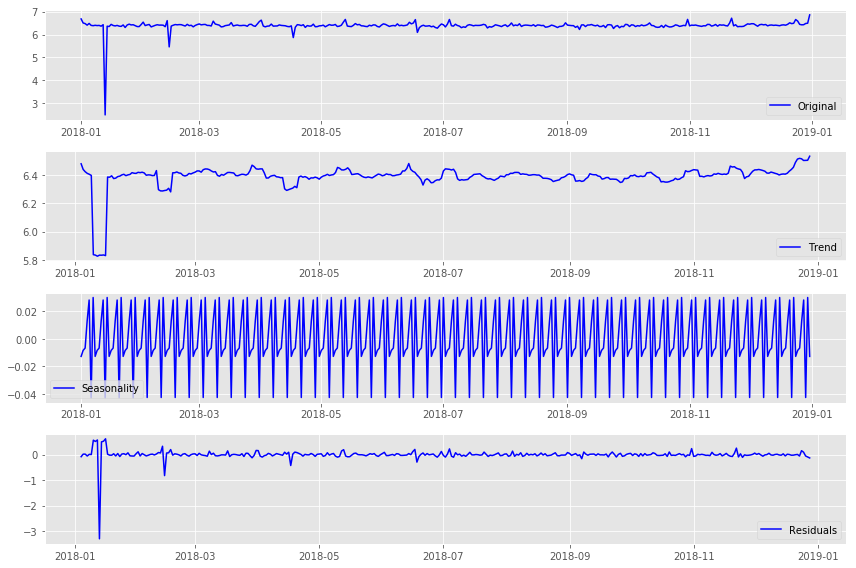

In [29]:
for sentiment in grouped.sentiment.unique():
    print(sentiment)
    df_decompose(t2018_log[sentiment])

**Based on these decomposition graphs, it seems pretty clear that tweet sentiment is subject to seasonality on the scale of about a week.**

However, this presents us with a problem: Is the sentiment seasonality tied to the work week or to the lunar week?

Though lunar weeks are on average 7 days long, this is not an exact number which is why full moons do not occur on the same weekday throughout the year. Bearing this in mind, we need to develop some basic models to see if our data's seasonality is only affected by calendar weeks, only by lunar weeks, or some combination of the two. My preliminary hypothesis going in will be that calendar weeks are the driving force, but that lunar cycles also have a small impact. 

This is a fairly tricky problem to solve, but fortunately Facebook's Prophet library has precisely the features we need to solve it.

## Using Facebook Prophet to decode multiple seasonalities

https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [30]:
#prepare grouped sentiment data for FBProphet processing
grp_pos = grouped[grouped.sentiment == 'positive'].drop('sentiment', axis=1).reset_index(drop=True)
grp_pos.columns = ['ds','y']
display(grp_pos.head())

grp_neg = grouped[grouped.sentiment == 'negative'].drop('sentiment', axis=1).reset_index(drop=True)
grp_neg.columns = ['ds','y']

grp_neut = grouped[grouped.sentiment == 'neutral'].drop('sentiment', axis=1).reset_index(drop=True)
grp_neut.columns = ['ds','y']

ds    y
0 2018-01-01  798
1 2018-01-02  669
2 2018-01-03  651
3 2018-01-04  608
4 2018-01-05  656

In [31]:
m = Prophet()
m.fit(grp_pos)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods=56)
future.tail()

ds
416 2019-02-21
417 2019-02-22
418 2019-02-23
419 2019-02-24
420 2019-02-25

In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
416 2019-02-21  660.967832  588.215366  736.264502
417 2019-02-22  670.142267  599.381568  743.029743
418 2019-02-23  661.888877  587.681219  736.233164
419 2019-02-24  671.943982  598.878733  746.821971
420 2019-02-25  656.613965  581.994326  727.513502

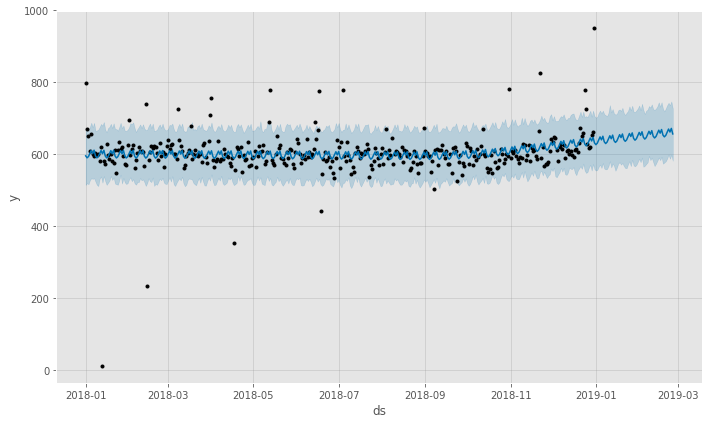

In [34]:
fig1 = m.plot(forecast)

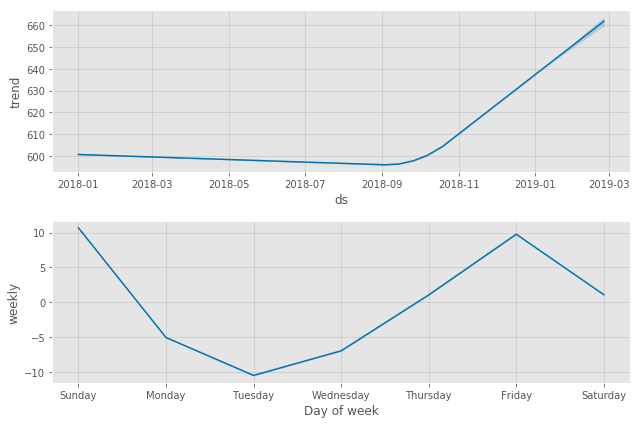

In [35]:
fig2 = m.plot_components(forecast)

In [36]:
# Let's make an interactive graph of this data
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

#### Now to take the lunar phase dates into account

In [61]:
phases_2018_19.head()

phase       date weekday      time
0      Full Moon 2018-01-02     Tue   2:25 AM
1   Last Quarter 2018-01-08     Mon  10:26 PM
2       New Moon 2018-01-17     Wed   2:18 AM
3  First Quarter 2018-01-24     Wed  10:20 PM
4      Full Moon 2018-01-31     Wed   1:27 PM

In [62]:
# let's separate the different moon phases
full_moons = pd.DataFrame(phases_2018_19.loc[phases_2018_19['phase'] == 'Full Moon']['date']).reset_index(drop=True)
full_moons.columns = ['ds']
full_moons['holiday'] = 'fullmoon'
full_moons['lower_window'] = 0
full_moons['upper_window'] = 1
full_moons.head()

ds   holiday  lower_window  upper_window
0 2018-01-02  fullmoon             0             1
1 2018-01-31  fullmoon             0             1
2 2018-03-02  fullmoon             0             1
3 2018-03-31  fullmoon             0             1
4 2018-04-30  fullmoon             0             1

In [63]:
# and doing the same for the other phases of the moon
new_moons = pd.DataFrame(phases_2018_19.loc[phases_2018_19['phase'] == 'New Moon']['date']).reset_index(drop=True)
new_moons.columns = ['ds']
new_moons['holiday'] = 'newmoon'
new_moons['lower_window'] = 0
new_moons['upper_window'] = 1

lastq_moons = pd.DataFrame(phases_2018_19.loc[phases_2018_19['phase'] == 'Last Quarter']['date']).reset_index(drop=True)
lastq_moons.columns = ['ds']
lastq_moons['holiday'] = 'lastqmoon'
lastq_moons['lower_window'] = 0
lastq_moons['upper_window'] = 1

firstq_moons = pd.DataFrame(phases_2018_19.loc[phases_2018_19['phase'] == 'First Quarter']['date']).reset_index(drop=True)
firstq_moons.columns = ['ds']
firstq_moons['holiday'] = 'firstqmoon'
firstq_moons['lower_window'] = 0
firstq_moons['upper_window'] = 1

In [64]:
phases = pd.concat((full_moons, new_moons, lastq_moons, firstq_moons))

In [65]:
m = Prophet(holidays=phases)
forecast = m.fit(grp_pos).predict(future)
forecast[(forecast['fullmoon'] + forecast['lastqmoon'] + forecast['newmoon'] + forecast['firstqmoon']).abs() > 0][
        ['ds', 'fullmoon', 'lastqmoon', 'newmoon', 'firstqmoon']][:10]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds  fullmoon  lastqmoon    newmoon  firstqmoon
1  2018-01-02   6.83402   0.000000   0.000000    0.000000
2  2018-01-03  21.93742   0.000000   0.000000    0.000000
7  2018-01-08   0.00000  25.643439   0.000000    0.000000
8  2018-01-09   0.00000   6.101625   0.000000    0.000000
16 2018-01-17   0.00000   0.000000   6.045544    0.000000
17 2018-01-18   0.00000   0.000000 -18.487607    0.000000
23 2018-01-24   0.00000   0.000000   0.000000   -2.923125
24 2018-01-25   0.00000   0.000000   0.000000  -14.008724
30 2018-01-31   6.83402   0.000000   0.000000    0.000000
31 2018-02-01  21.93742   0.000000   0.000000    0.000000

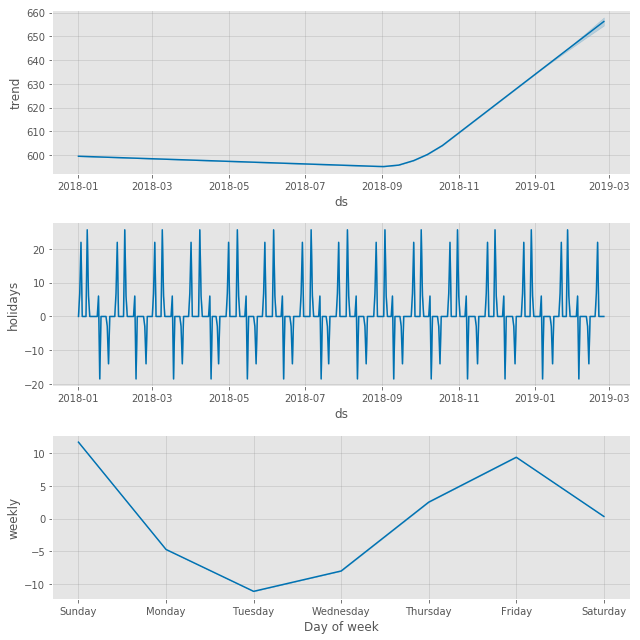

In [66]:
fig = m.plot_components(forecast)

## if you want to just plot only one of the holiday types, run the code below:
# from fbprophet.plot import plot_forecast_component
# plot_forecast_component(m, forecast, 'fullmoon')

**Wow! This is amazing! It sure looks like lunar cycles impact Twitter sentiment, but we should perform some cross validations and look at performance metrics to make sure our eyes aren't deceiving us.**

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-04-05 00:00:00 and 2018-12-01 00:00:00


horizon          mse       rmse        mae      mape  coverage
0  3 days   914.133873  30.234647  23.448582  0.039374  1.000000
1  4 days   959.381896  30.973891  24.930989  0.042609  1.000000
2  5 days  1195.440455  34.575142  26.783305  0.046092  0.960784
3  6 days  1993.427397  44.647815  27.517496  0.045010  0.941176
4  7 days  2211.810236  47.029887  28.532193  0.046064  0.921569

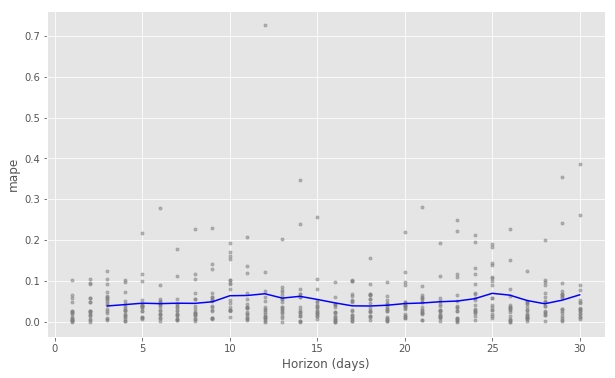

In [128]:
# cross validating using time horizons within the dataset
df_cv = cross_validation(m, initial='90 days', period='15 days', horizon = '30 days')

# performance metrics for the FBProphet model
df_p = performance_metrics(df_cv)
display(df_p.head())

# plotting performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')

The graph imediately above shows that, based on the crossvalidations that were performed, the FBProphet model averages a 5-8% error rate for predictions up to a month into the future.

### It appears that Lunar Cycles have a considerable effect on Tweet Sentiment!

Looking at the `holidays` graph above, it is apparent that full moon days have the most profound (and positive) impact on the proportion of tweets that express positive sentiment. Last quarter moons are still positive, new moons have almost no influence and, surprisingly, first quarter moons actually exhibit a *negative* influence on positive sentiment!

Let's look at some stock data to see if this trend carries over to financial markets.

fascinating notebook showing how to use FBProphet and multiple regressors (weather conditions, holidays, etc.) to analyze trends: https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

In [253]:
# Define functions to automate the process of inspecting lunar trends

def get_lunar_phases(year='2018'):
    "Given a year, returns a dataframe of lunar phases, dates, and times (UTC)."
    url = f"https://aa.usno.navy.mil/cgi-bin/aa_phases.pl?year={year}&nump=65&format=t"
    res_page = requests.get(url)
    soup = BeautifulSoup(res_page.content, 'html.parser')
    table_cells = soup.find_all("td")
    output = pd.DataFrame(columns=['phase','date','time'])
    for i in range(len(table_cells)):
        row = np.floor(i/2)
        if i%2 == 0:
            output.at[row,'phase'] = table_cells[i].text
        else:
            output.at[row,'date'] = table_cells[i].text[:12]  #need to grab just beggining of string
            output.at[row,'time'] = table_cells[i].text[-5:]  #need to grab just ending of string
    output.date = pd.to_datetime(output.date)
    output.reset_index(drop=True, inplace=True)
    return output


def lunar_phase_separator(year='2018', lower_window=0, upper_window=1):
    """
    Converts DataFrame of moon phases into FBProphet-friendly format.
    ---------------------
    Inputs:
    year            input the year you are examining
    lower_window    (<=0) number of days prior to moon phase to include in 'holiday'
    upper_window    (>=0) number of days after to moon phase to include in 'holiday'
    ---------------------
    Returns:        FBProphet-friendly DataFrame for use in 'holiday' parameter
    """
    # let's separate the different moon phases
    phases_df = get_lunar_phases(year=year)
    phase_names = ['Full Moon','Last Quarter','New Moon','First Quarter']
    ph_list = []
    for phase in phase_names:
        moons = pd.DataFrame(phases_df.loc[phases_df['phase'] == phase]['date']).reset_index(drop=True)
        moons.columns = ['ds']
        moons['holiday'] = str(phase).lower().replace(" ", "")
        moons['lower_window'] = lower_window
        moons['upper_window'] = upper_window
        ph_list.append(moons)
    phases = pd.concat((ph_list[0], ph_list[1], ph_list[2], ph_list[3]))
    return phases


def prep_data_for_FBP(data, column_name):
    """
    Given a DataFrame and the name of the column to be processed, 
    generates a FBProphet-ready DataFrame.
    """
    d = data.reset_index()
    prepped_data = d[['date', column_name]].sort_values(by=['date']).reset_index(drop=True)
    prepped_data.columns = ['ds','y']
    return prepped_data


def cross_val_FBP(model, metric='mape', show_metric_scores=False):
    # cross validating using time horizons within the dataset
    df_cv = cross_validation(model, initial='90 days', period='15 days', horizon = '30 days')
    # performance metrics for the FBProphet model
    df_p = performance_metrics(df_cv)
    if show_metric_scores == True:
        display(df_p.head())
    # plotting performance metrics
    fig = plot_cross_validation_metric(df_cv, metric)
    pass


def get_weekends(year='2018'):
    weekends_df = pd.DataFrame(columns=['date','day_of_week'])
    weekends_df.date = [date for date in pd.date_range(start=f'1/1/{year}', periods=470)]
    weekends_df.day_of_week = [datetime.datetime(int(str(date)[:4]), 
        int(str(date)[5:7]), int(str(date)[8:10])).weekday() for date in weekends_df.date]
    weekends_df = weekends_df[weekends_df.day_of_week >= 5].reset_index(drop=True)
    return weekends_df


def lunar_stock_trend(df, column_name, year='2018', lower_window=0, 
                      upper_window=1, trades_on_weekends=False,
                      cross_val=True, metric='mape',
                      show_metric_scores=False):
    """
    This function takes in a DataFrame of stock data and the 
    column name for the feature to be examined, the desired year,
    and lower & upper windows for 'holiday' dates.
    If the financial data contains values for weekends, set the
    'trades_on_weekends' parameter to 'True'.
    Additional option to cross-validate FBProphet model predictions, and
    select from a variety of metrics to use.
    ----------------------------------------------------
    Returns a list containing the model object, the 'future' dataframe
    used to make predictions, the forecast output DataFrame, a graph
    of the forecast, and a graph of forecast components.
    """
    phases = lunar_phase_separator(year, lower_window, upper_window)
    if trades_on_weekends == False:
        weekends_df = get_weekends(year)
        phases = phases[~phases['ds'].isin(weekends_df.date)]
    data = prep_data_for_FBP(df, column_name)
    m = Prophet(holidays=phases)
    m.fit(data)
    future = m.make_future_dataframe(periods=60, freq='D')
    if trades_on_weekends == False:
        future = future[~future['ds'].isin(weekends_df.date)]
    forecast = m.predict(future)
    disp_length = 4 * (1 + abs(lower_window) + abs(upper_window))
    display(forecast[(forecast['fullmoon'] + forecast['lastquarter'] + 
                      forecast['newmoon'] + forecast['firstquarter']).abs() > 
                     0][['ds', 'fullmoon', 'lastquarter', 'newmoon',
                         'firstquarter']][:disp_length])        
    fig1 = m.plot(forecast);
    fig1.set_size_inches(15, 5);
    fig2 = m.plot_components(forecast)
    fig2.set_size_inches(15, 10);
    if cross_val:
        cross_val_FBP(m, metric, show_metric_scores)
        
    return [m, future, forecast, fig1, fig2]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds  fullmoon  lastquarter   newmoon  firstquarter
0  2018-01-01 -0.001112     0.000000  0.000000      0.000000
1  2018-01-02 -0.000852     0.000000  0.000000      0.000000
2  2018-01-03  0.001742     0.000000  0.000000      0.000000
5  2018-01-08  0.000000    -0.001992  0.000000      0.000000
6  2018-01-09  0.000000    -0.000270  0.000000      0.000000
11 2018-01-16  0.000000     0.000000  0.000724      0.000000
12 2018-01-17  0.000000     0.000000  0.000350      0.000000
13 2018-01-18  0.000000     0.000000 -0.003139      0.000000
16 2018-01-23  0.000000     0.000000  0.000000      0.001664
17 2018-01-24  0.000000     0.000000  0.000000      0.000903
18 2018-01-25  0.000000     0.000000  0.000000      0.000281
21 2018-01-30 -0.001112     0.000000  0.000000      0.000000

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-04-05 00:00:00 and 2018-12-01 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


[<fbprophet.forecaster.Prophet at 0x1fdd0268860>,             ds
 0   2018-01-01
 1   2018-01-02
 2   2018-01-03
 3   2018-01-04
 4   2018-01-05
 6   2018-01-08
 7   2018-01-09
 8   2018-01-10
 9   2018-01-11
 10  2018-01-12
 12  2018-01-15
 13  2018-01-16
 14  2018-01-17
 15  2018-01-18
 16  2018-01-19
 18  2018-01-22
 19  2018-01-23
 20  2018-01-24
 21  2018-01-25
 22  2018-01-26
 24  2018-01-29
 25  2018-01-30
 26  2018-01-31
 27  2018-02-01
 28  2018-02-02
 30  2018-02-05
 31  2018-02-06
 32  2018-02-07
 33  2018-02-08
 34  2018-02-09
 ..         ...
 334 2019-01-21
 335 2019-01-22
 336 2019-01-23
 337 2019-01-24
 338 2019-01-25
 341 2019-01-28
 342 2019-01-29
 343 2019-01-30
 344 2019-01-31
 345 2019-02-01
 348 2019-02-04
 349 2019-02-05
 350 2019-02-06
 351 2019-02-07
 352 2019-02-08
 355 2019-02-11
 356 2019-02-12
 357 2019-02-13
 358 2019-02-14
 359 2019-02-15
 362 2019-02-18
 363 2019-02-19
 364 2019-02-20
 365 2019-02-21
 366 2019-02-22
 369 2019-02-25
 370 2019-02-26
 371 20

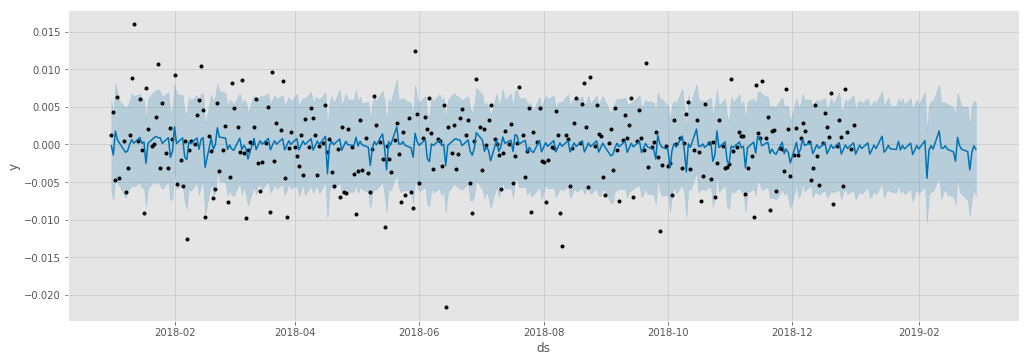

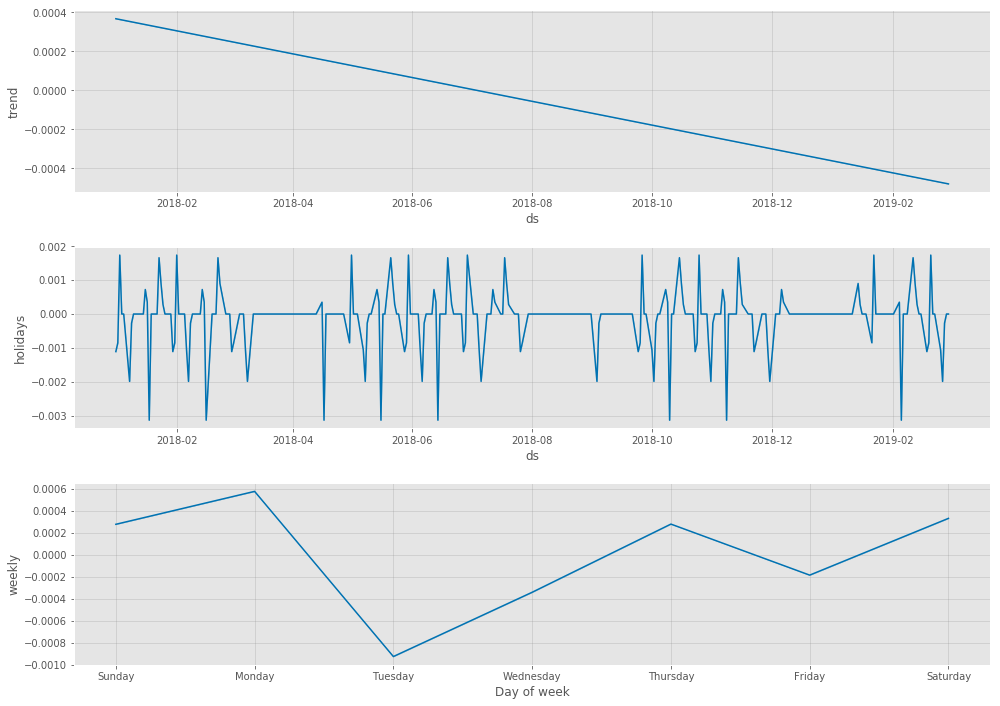

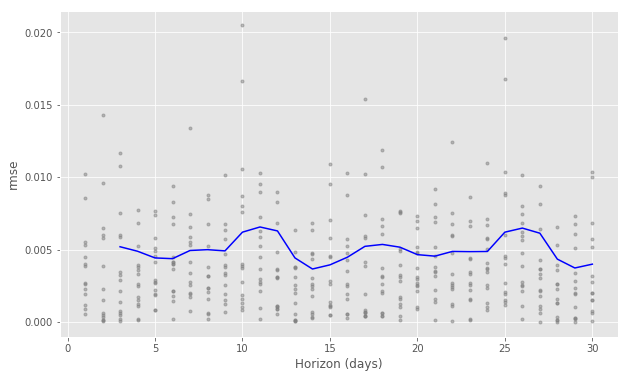

In [256]:
lunar_stock_trend(df=EUR_2018,
                  column_name='change_24',
                  year='2018',
                  lower_window=-1,
                  upper_window=1,
                  trades_on_weekends=False,
                  cross_val=True,
                  metric='rmse', 
                  show_metric_scores=False)

**Wow! Financial markets are also exhibiting lunar cycle influences!** However, in the case of the Euro, it seems the impact is pretty small. Nevertheless, there is a distinct pattern correlating to the four lunar phases. Surprisingly, the *new moon* appears to be the most influential, with influence decreasing throughout the rest of the lunar cycle.

We need to dig in a bit deeper, but the graph of the Euro-USDollar exchange market pretty clearly exhibits responses to lunar cycles. Keep in mind that physical currencies are only traded 6 days a week (approximately), stocks are traded 5 days a week, and digital currencies are traded 24/7/365. 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds    fullmoon  lastquarter     newmoon  firstquarter
0  2018-01-01 -143.410663     0.000000    0.000000      0.000000
1  2018-01-02  131.842945     0.000000    0.000000      0.000000
2  2018-01-03  -51.565888     0.000000    0.000000      0.000000
6  2018-01-07    0.000000   -23.490396    0.000000      0.000000
7  2018-01-08    0.000000  -184.168789    0.000000      0.000000
8  2018-01-09    0.000000   -12.658068    0.000000      0.000000
15 2018-01-16    0.000000     0.000000 -210.323993      0.000000
16 2018-01-17    0.000000     0.000000  -42.432272      0.000000
17 2018-01-18    0.000000     0.000000   64.374361      0.000000
22 2018-01-23    0.000000     0.000000    0.000000    -35.048626
23 2018-01-24    0.000000     0.000000    0.000000    -25.695347
24 2018-01-25    0.000000     0.000000    0.000000   -115.006384

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-04-05 00:00:00 and 2018-12-01 00:00:00


[<fbprophet.forecaster.Prophet at 0x1fdd06e4470>,             ds
 0   2018-01-01
 1   2018-01-02
 2   2018-01-03
 3   2018-01-04
 4   2018-01-05
 5   2018-01-06
 6   2018-01-07
 7   2018-01-08
 8   2018-01-09
 9   2018-01-10
 10  2018-01-11
 11  2018-01-12
 12  2018-01-13
 13  2018-01-14
 14  2018-01-15
 15  2018-01-16
 16  2018-01-17
 17  2018-01-18
 18  2018-01-19
 19  2018-01-20
 20  2018-01-21
 21  2018-01-22
 22  2018-01-23
 23  2018-01-24
 24  2018-01-25
 25  2018-01-26
 26  2018-01-27
 27  2018-01-28
 28  2018-01-29
 29  2018-01-30
 ..         ...
 395 2019-01-31
 396 2019-02-01
 397 2019-02-02
 398 2019-02-03
 399 2019-02-04
 400 2019-02-05
 401 2019-02-06
 402 2019-02-07
 403 2019-02-08
 404 2019-02-09
 405 2019-02-10
 406 2019-02-11
 407 2019-02-12
 408 2019-02-13
 409 2019-02-14
 410 2019-02-15
 411 2019-02-16
 412 2019-02-17
 413 2019-02-18
 414 2019-02-19
 415 2019-02-20
 416 2019-02-21
 417 2019-02-22
 418 2019-02-23
 419 2019-02-24
 420 2019-02-25
 421 2019-02-26
 422 20

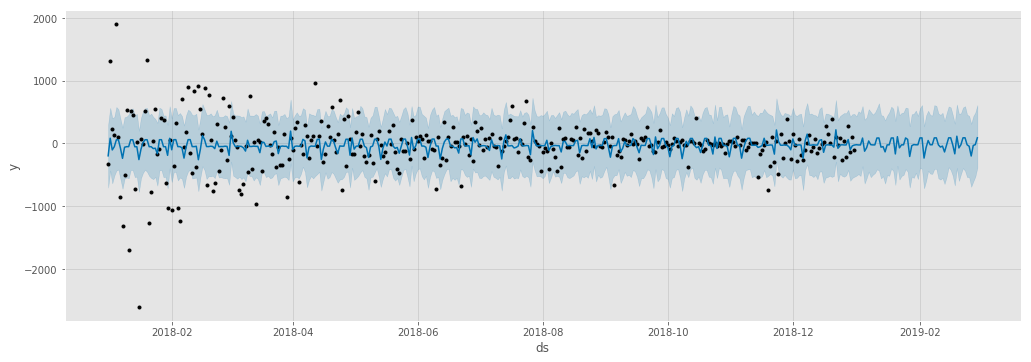

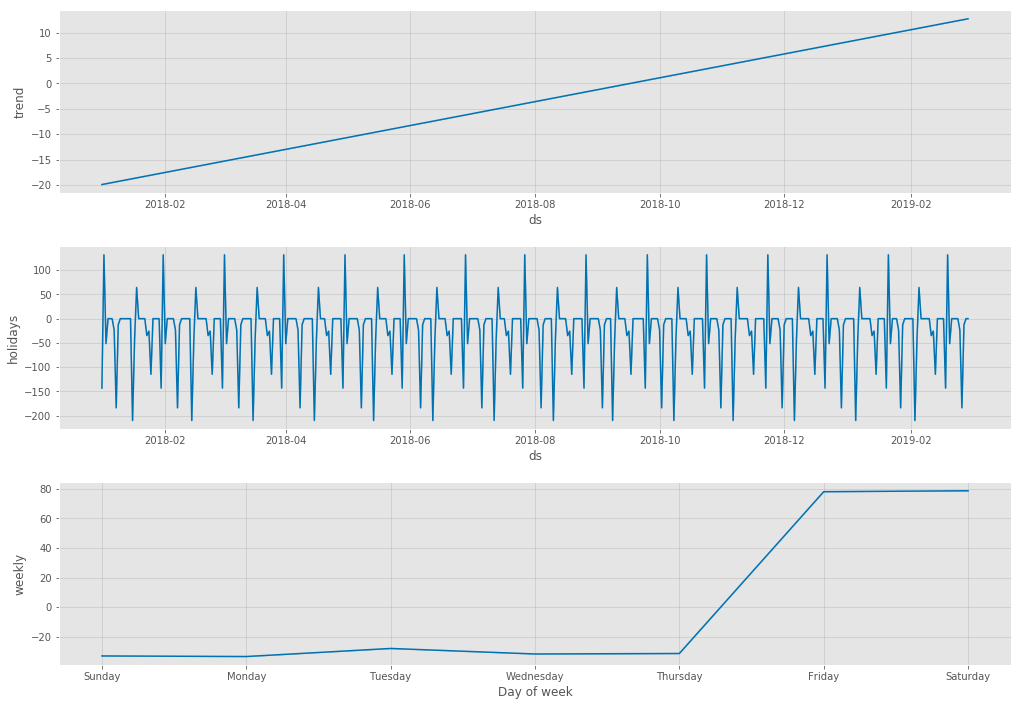

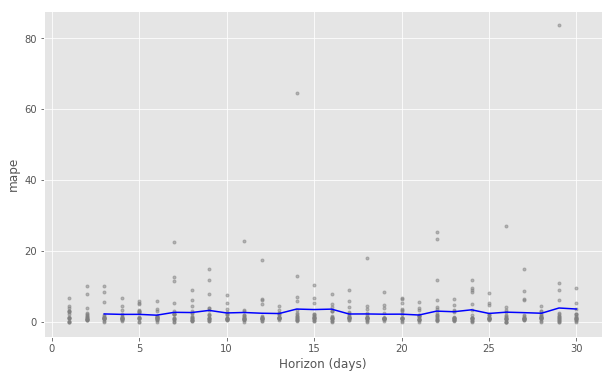

In [260]:
lunar_stock_trend(df=BTC_2018,
                  column_name='change_24',
                  year='2018',
                  lower_window=-1,
                  upper_window=1,
                  trades_on_weekends=True,
                  cross_val=True,
                  metric='mape', 
                  show_metric_scores=False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds  fullmoon  lastquarter    newmoon  firstquarter
0  2018-01-02 -7.390925     0.000000   0.000000      0.000000
1  2018-01-03  0.359953     0.000000   0.000000      0.000000
4  2018-01-08  0.000000    22.417129   0.000000      0.000000
5  2018-01-09  0.000000    -8.939341   0.000000      0.000000
9  2018-01-16  0.000000     0.000000  17.453645      0.000000
10 2018-01-17  0.000000     0.000000   1.670558      0.000000
11 2018-01-18  0.000000     0.000000 -14.308549      0.000000
14 2018-01-23  0.000000     0.000000   0.000000      0.818174
15 2018-01-24  0.000000     0.000000   0.000000     11.886779
16 2018-01-25  0.000000     0.000000   0.000000      1.489779
19 2018-01-30 -8.740518     0.000000   0.000000      0.000000
20 2018-01-31 -7.390925     0.000000   0.000000      0.000000

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-04-05 00:00:00 and 2018-12-01 00:00:00


[<fbprophet.forecaster.Prophet at 0x1fdd169c7f0>,             ds
 0   2018-01-02
 1   2018-01-03
 2   2018-01-04
 3   2018-01-05
 4   2018-01-08
 5   2018-01-09
 6   2018-01-10
 7   2018-01-11
 8   2018-01-12
 9   2018-01-16
 10  2018-01-17
 11  2018-01-18
 12  2018-01-19
 13  2018-01-22
 14  2018-01-23
 15  2018-01-24
 16  2018-01-25
 17  2018-01-26
 18  2018-01-29
 19  2018-01-30
 20  2018-01-31
 21  2018-02-01
 22  2018-02-02
 23  2018-02-05
 24  2018-02-06
 25  2018-02-07
 26  2018-02-08
 27  2018-02-09
 28  2018-02-12
 29  2018-02-13
 ..         ...
 271 2019-01-21
 272 2019-01-22
 273 2019-01-23
 274 2019-01-24
 275 2019-01-25
 278 2019-01-28
 279 2019-01-29
 280 2019-01-30
 281 2019-01-31
 282 2019-02-01
 285 2019-02-04
 286 2019-02-05
 287 2019-02-06
 288 2019-02-07
 289 2019-02-08
 292 2019-02-11
 293 2019-02-12
 294 2019-02-13
 295 2019-02-14
 296 2019-02-15
 299 2019-02-18
 300 2019-02-19
 301 2019-02-20
 302 2019-02-21
 303 2019-02-22
 306 2019-02-25
 307 2019-02-26
 308 20

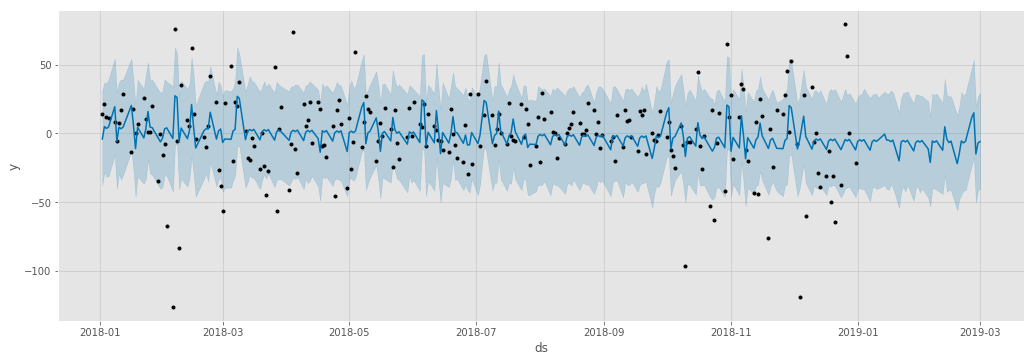

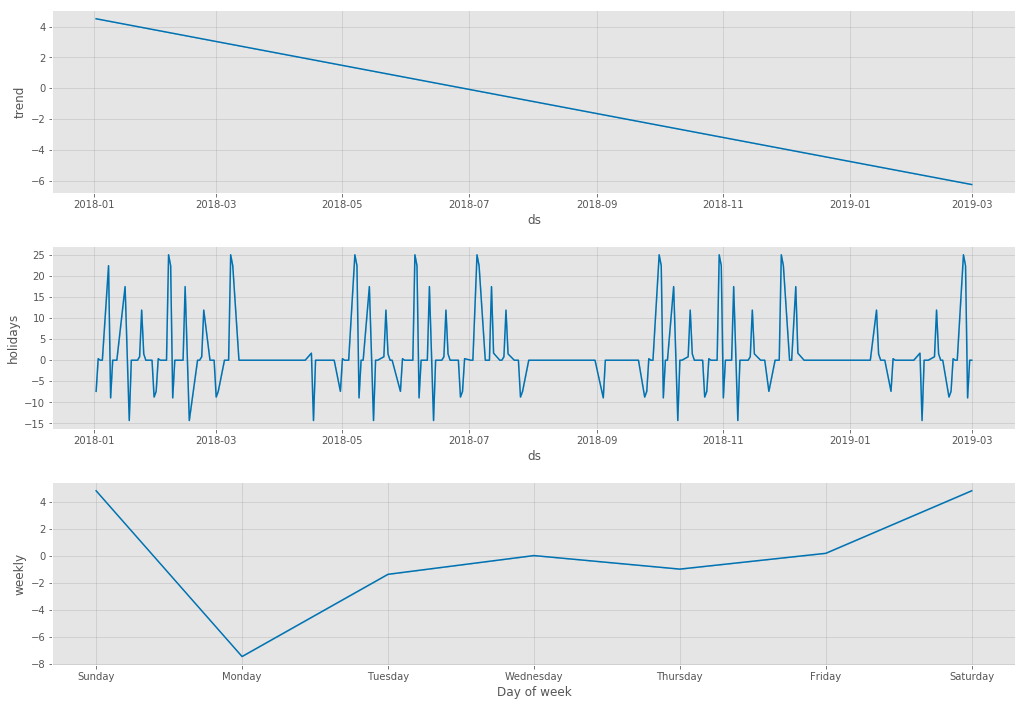

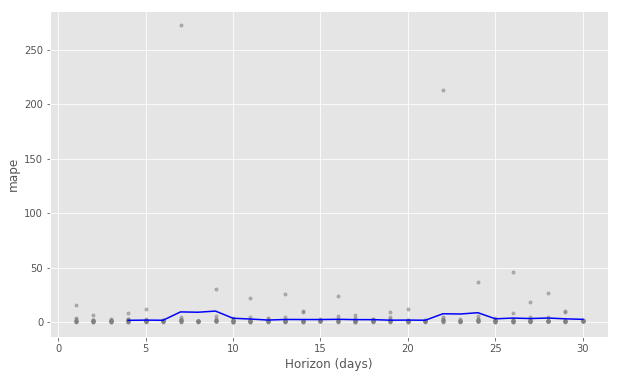

In [261]:
lunar_stock_trend(df=SP500_2018,
                  column_name='change_24',
                  year='2018',
                  lower_window=-1,
                  upper_window=1,
                  trades_on_weekends=False,
                  cross_val=True,
                  metric='mape', 
                  show_metric_scores=False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds  fullmoon  lastquarter   newmoon  firstquarter
0  2018-01-02 -0.311002     0.000000  0.000000      0.000000
1  2018-01-03 -0.048919     0.000000  0.000000      0.000000
4  2018-01-08  0.000000     0.776920  0.000000      0.000000
5  2018-01-09  0.000000    -0.845517  0.000000      0.000000
9  2018-01-16  0.000000     0.000000  0.862165      0.000000
10 2018-01-17  0.000000     0.000000  0.281802      0.000000
11 2018-01-18  0.000000     0.000000 -1.051394      0.000000
14 2018-01-23  0.000000     0.000000  0.000000     -0.005671
15 2018-01-24  0.000000     0.000000  0.000000      1.003441
16 2018-01-25  0.000000     0.000000  0.000000     -0.216457
19 2018-01-30 -0.375868     0.000000  0.000000      0.000000
20 2018-01-31 -0.311002     0.000000  0.000000      0.000000

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-04-05 00:00:00 and 2018-12-01 00:00:00


[<fbprophet.forecaster.Prophet at 0x1fdd18680f0>,             ds
 0   2018-01-02
 1   2018-01-03
 2   2018-01-04
 3   2018-01-05
 4   2018-01-08
 5   2018-01-09
 6   2018-01-10
 7   2018-01-11
 8   2018-01-12
 9   2018-01-16
 10  2018-01-17
 11  2018-01-18
 12  2018-01-19
 13  2018-01-22
 14  2018-01-23
 15  2018-01-24
 16  2018-01-25
 17  2018-01-26
 18  2018-01-29
 19  2018-01-30
 20  2018-01-31
 21  2018-02-01
 22  2018-02-02
 23  2018-02-05
 24  2018-02-06
 25  2018-02-07
 26  2018-02-08
 27  2018-02-09
 28  2018-02-12
 29  2018-02-13
 ..         ...
 271 2019-01-21
 272 2019-01-22
 273 2019-01-23
 274 2019-01-24
 275 2019-01-25
 278 2019-01-28
 279 2019-01-29
 280 2019-01-30
 281 2019-01-31
 282 2019-02-01
 285 2019-02-04
 286 2019-02-05
 287 2019-02-06
 288 2019-02-07
 289 2019-02-08
 292 2019-02-11
 293 2019-02-12
 294 2019-02-13
 295 2019-02-14
 296 2019-02-15
 299 2019-02-18
 300 2019-02-19
 301 2019-02-20
 302 2019-02-21
 303 2019-02-22
 306 2019-02-25
 307 2019-02-26
 308 20

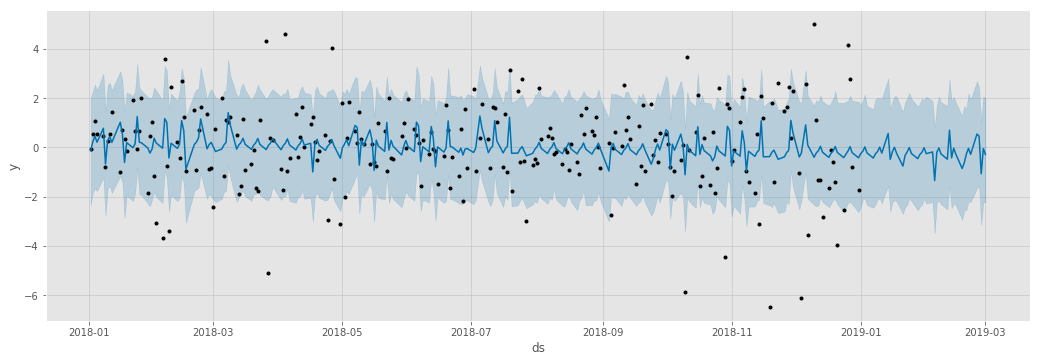

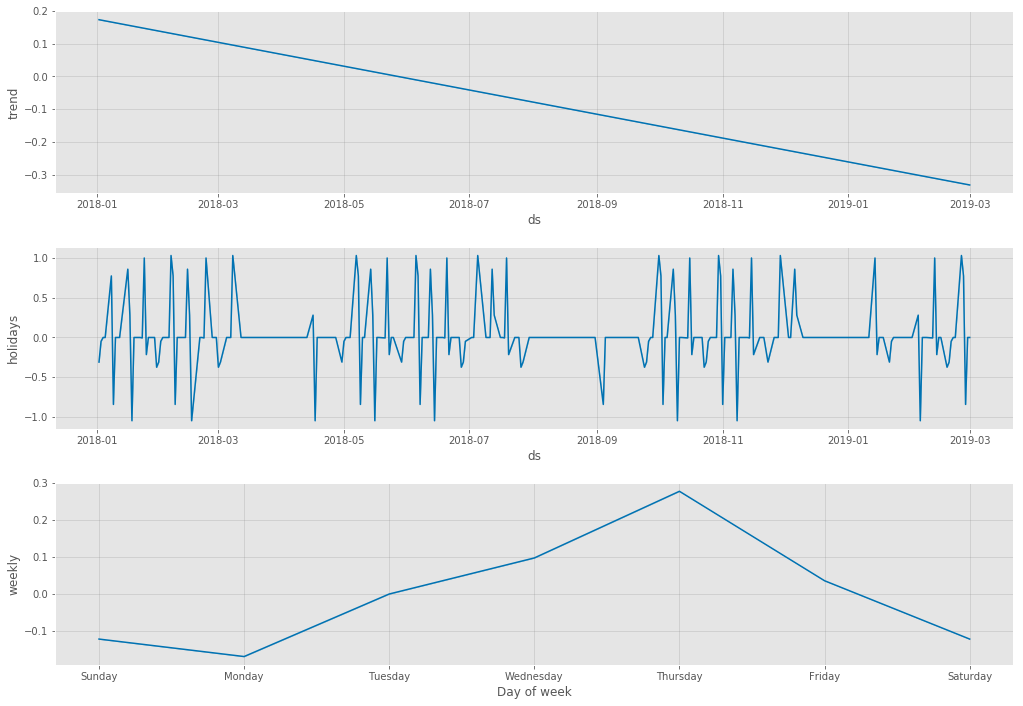

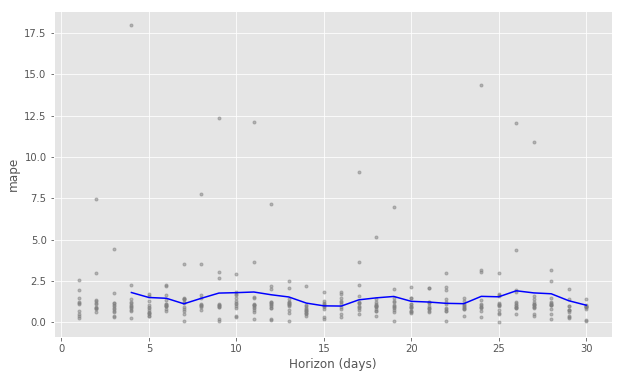

In [262]:
lunar_stock_trend(df=MSFT_2018,
                  column_name='change_24',
                  year='2018',
                  lower_window=-1,
                  upper_window=1,
                  trades_on_weekends=False,
                  cross_val=True,
                  metric='mape', 
                  show_metric_scores=False)

**Well, after looking at a stock, a market index, a physical currency, and a cryptocurrency, it seems pretty apparent that there is some sort of lunar-phase-seasonality effect in financial markets of all sorts.** While it may be a relatively small influence in all cases, the regularity in occurence and uniformity in influence strongly suggests that lunar cycles have a real and quantifiable influence on human behavior (whether in tweets or financial decisions).

# code for a way to remove outliers automatically

# make functions to automate scraping financial data from a list of stock symbols

be sure to account for whether it's a stock, a currency, or a cryptocurrency